In [1]:
text="CBCCCFFFFFFFGGGGGGGGGGHHHHGHHHHHHHHHHHFHHHHHHHFHHHH"

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
import matplotlib.patches as patches

In [3]:
# !pip install biopython

In [5]:
fasta_sequences = SeqIO.parse(open(r"C:\Users\cantek\Desktop\a1\lifesciences\80_R1.fastq"),'fastq')

In [ ]:
l=[] 
for fasta in fasta_sequences:
        name, sequence,ann = fasta.id, str(fasta.seq), fasta.annotations
        print(fasta.letter_annotations["phred_quality"])
        l.append(fasta.letter_annotations["phred_quality"])
        print("========")

In [6]:
def plot_fastq_qualities(filename, ax=None, limit=10000):
    fastq_parser = SeqIO.parse(open(filename), "fastq")
    res=[]
    c=0
    for record in fastq_parser:
        score=record.letter_annotations["phred_quality"]
        res.append(score)
        c+=1
        if c>limit:
            break
    df = pd.DataFrame(res)
    l = len(df.T)+1

    if ax==None:
        f,ax=plt.subplots(figsize=(20,10))
        
    rect = patches.Rectangle((0,0),l,20,linewidth=0,facecolor='r',alpha=.4)
    ax.add_patch(rect)
    rect = patches.Rectangle((0,20),l,8,linewidth=0,facecolor='yellow',alpha=.4)
    ax.add_patch(rect)
    rect = patches.Rectangle((0,28),l,12,linewidth=0,facecolor='g',alpha=.4)
    ax.add_patch(rect)
    
    
    boxprops = dict(linestyle='-', linewidth=1, color='yellow')
    df.plot(kind='box', ax=ax, grid=False, showfliers=False,widths=0.5,patch_artist=True,
            color=dict(boxes='yellow',whiskers='black',medians="red")  )
    df.mean().plot(ax=ax,c='blue')
    ax.set_xticks(np.arange(0, l, 5))
    ax.set_xticklabels(np.arange(0, l, 5))
    ax.set_xlabel('position(bp)')
    ax.set_xlim((0,l))
    ax.set_ylim((0,40))
    ax.set_title('per base sequence quality')    
    return

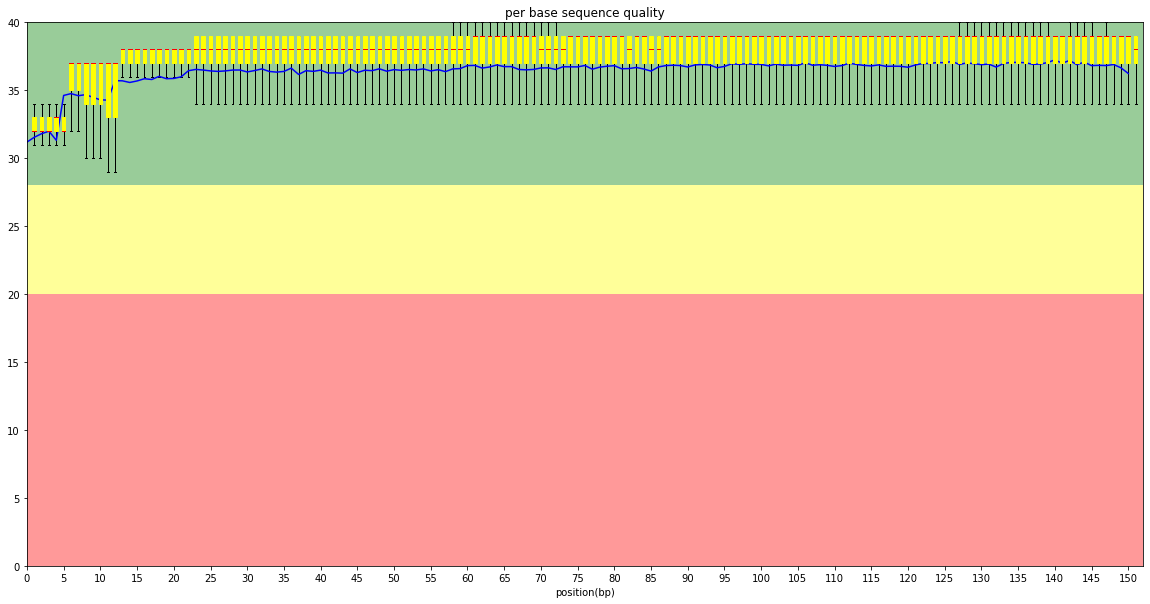

In [8]:
plot_fastq_qualities(r"C:\Users\cantek\Desktop\a1\lifesciences\80_R1.fastq")

In [ ]:
p_error_list = pd.read_excel(r"C:\Users\cantek\Desktop\a1\P_error_table.xlsx")
p_error_list["error"]=p_error_list["error"].astype(float)
dic= p_error_list[["Ascii","error"]].to_dict()

In [ ]:
dict_error={}
for i,r in p_error_list.iterrows():
    dict_error[r["Ascii"]]=r["error"]

In [ ]:
def calc_q(p):
    return int(-10*math.log10(p))

In [ ]:
len(text)

In [ ]:
list_q=[]
for t in text:  
    list_q.append(calc_q(dict_error[ord(t)]))

In [ ]:
meanq = np.mean(list_q)

In [ ]:
print(np.min(list_q))
print(np.max(list_q))
print(np.median(list_q))
print(np.mean(list_q))

In [ ]:
print(np.min(l[0]))
print(np.max(l[0]))
print(np.median(l[0]))
print(np.mean(l[0]))

In [ ]:
import seaborn as sns

In [ ]:
fig4, ax4 = plt.subplots(figsize=(20,10))
ax4.set_title('Hide Outlier Points')
ax4.boxplot(l[:50], showfliers=False)